In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
# local imports
import Plotting as myplt

In [2]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [3]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s'   : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s'   : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s t1' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv',
   'Bulb 2s t2' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 2.csv',
   'Bulb 2s t3' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 3.csv'
} # s==slit, t==trial

In [4]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s t1 columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']
Bulb 2s t2 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 2s t3 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']


# Fit

In [5]:
# unit conversions
def mmTOm(x): return x/1E3
def umTOm(x): return x/1E6

In [16]:
# # calculating Intensity distribution 
# def Theta(x,D) :
#     return (x/D)

# def Alpha(x,a,lam,D) : 
#     return ( np.pi * a / lam ) * np.sin( Theta(x,D) )

# def Beta(x,b,lam,D) : 
#     return ( np.pi * b / lam ) * np.cos( Theta(x,D) ) 

# def I(x, I0, a, b, lam, D) : 
#     alp = Alpha(x,a,lam,D)
#     bet = Beta(x,b,lam,D)
#     return I0 * (np.cos(bet))**2 * (np.sin(alp) / alp)**2

In [17]:
# find maxima
def GetI0(tables: dict[str, dict[str, np.array]]) : 
    """Gets the value of the central maximum as I0"""
    # loop for each item 
    for keyExperiment,valueDict in tables.items() : 
        if('Voltage (V)' in valueDict) : 
            valueDict['I0'] = max(valueDict['Voltage (V)'])
        elif('Photon/S (Hz)' in valueDict) :
            valueDict['I0'] = max(valueDict['Photon/S (Hz)'])
        else : 
            raise Exception('Invalid key')
        print(keyExperiment, valueDict['I0'])
        
GetI0(tables)

Laser 1s 0.288
Laser 2s 0.41
Bulb 2s t1 251.6
Bulb 2s t2 240.0
Bulb 2s t3 243.3


In [22]:
def I(x, I0, alp, bet) : 
    return I0 * (np.cos(x*bet))**2 * (np.sin(x*alp) / (x*alp))**2

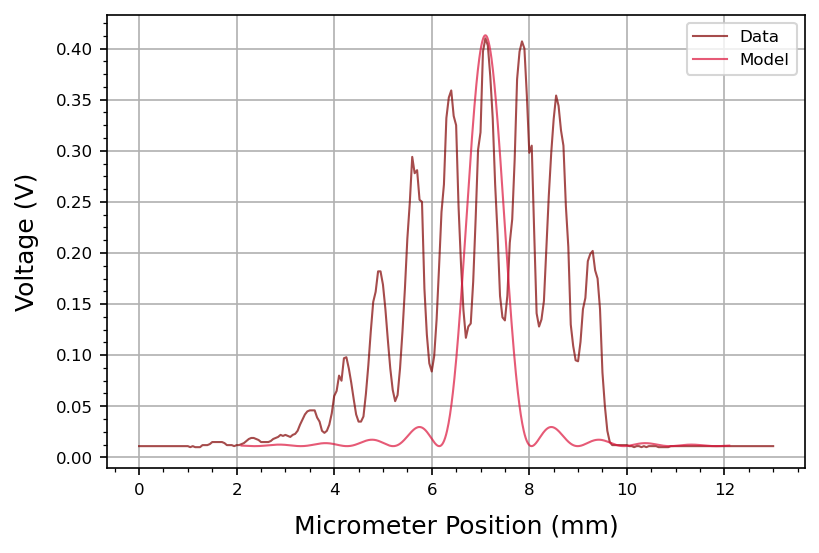

In [21]:
# define constants 
a_m = mmTOm(0.085)                  # 0.085 mm # slit width
# b_m = mmTOm(0.353)                  # 0.353 mm # distance between slits 
b_m = mmTOm(0.140)                  # 0.353 mm # distance between slits  # TODO from MaxMin program 
lam_R_m = umTOm(0.670)               # 0.67 +/- 0.005 um # red laser wavelength 
lam_G_m = umTOm( (0.541+0.551)/2. ) # center of 0.541 - 0.551 um # green bulb wavelength 
D_mm = 120.                         # +/- 3 mm # distnace between slit and detector

# calculate model 
xm = np.linspace(-5, 5, 1000)
# ym = I( xm, tables['Laser 2s']['I0'], a_m, b_m, lam_R_m, D_mm )
ym = I(xm, tables['Laser 2s']['I0'])

shiftx = tables['Laser 2s']['Micrometer Position (mm)'] [ # get x position of maximum
        np.where( 
            tables['Laser 2s']['Voltage (V)'] == max(tables['Laser 2s']['Voltage (V)']) # get index of maximum 
        ) [0] 
    ]
shifty = tables['Laser 2s']['Voltage (V)'] [0]

myplt.PlotMultiXY(
    x = [
            tables['Laser 2s']['Micrometer Position (mm)'], xm + shiftx
        ],
    y = [
            tables['Laser 2s']['Voltage (V)'], ym + shifty
        ],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    color = [
                'maroon', 'crimson'
            ],
    legend = [
        'Data', 'Model'
    ],
    # xlim = [2,12],
    # ylim = [0,0.45],
    # fileName = path_fig + 'x.png'
)